# Многомодульные программы. Парсинг веб страниц

### Многомодульные программы

В Python, при импорте модуля, интерпретатор сначала ищет файл с расширением .py, а затем, если он найден, создает и сохраняет скомпилированный .pyc-файл (байт-код) для более эффективной загрузки модуля в будущем. .pyc-файл содержит предварительно скомпилированный код, который интерпретатор может выполнять непосредственно.

🤓Создайте два файла и импортируйте из одного второй по имени. Покажите .pyc-файл, который появится при этом.

In [ ]:
#В pycharm (удобнее)

### Пакеты

 Пакеты в Python являются способом организации и группировки связанных модулей. Пакеты представляют собой директории, которые содержат модули и другие пакеты, а также файлы `__init__.py`, которые указывают интерпретатору, что директория является пакетом.

In [ ]:
# planimertia.py  модуль
'''
from math import pi, pow


class Rectangle:
    def __init__(self, a, b):
        self.w = a
        self.h = b

    def square(self):
        return round(self.w * self.h)

    def perimeter(self):
        return 2 * (self.w + self.h)


class Circle:
    def __init__(self,radius):
        self.r = radius
        
    def square(self):
        return round(pi * pow(self.r,2),2)

    def length(self):
        return round(2*pi*self.r)
'''

#### Вариант 1

In [ ]:
# если planimetry.py лежит в каталоге с *.ipynb
import planimetry

In [4]:
#Теперь доступен код из файла planimetry.py
c = planimetry.Circle(5)
print(c.square())

78.54


In [3]:
#Импорт с псевдонимом
import planimetry as pl
c = pl.Circle(5)
print(c.square())

78.54


#### Вариант 2

In [1]:
# Импортируем только класс Restangle
from planimetry import Rectangle

In [2]:
Rectangle(5,4).square()

20

In [3]:
Circle(5).square()

NameError: name 'Circle' is not defined

In [4]:
from planimetry import *

In [5]:
Circle(5).square()

78.54

#### Вариант 3

В основной программе можно импортировать несколько файлов [stereometria, planimetria] для этого создадим пакет.

In [ ]:
geoma/
├── __init__.py
├── stereometry.py
└── planimetry.py

In [6]:
from geoma import stereometry


In [7]:
stereometry.Cuboid(1,2,3).S()

22

In [8]:
from geoma import *

In [9]:
planimetry.Rectangle(2,4).square()

NameError: name 'planimetry' is not defined

In [ ]:
# Допишем в файл __init__.py в папке(пакете) geoma
__all__=['planimetry','stereometry']

In [1]:
from geoma import *

In [2]:
planimetry.Rectangle(2,4).square()

8

In [3]:
stereometry.Cuboid(2,4,1).S()

28

In [ ]:
# Когда вам нужно импортировать пакет, который находится не в текущей директории, есть несколько способов это сделать.

In [ ]:
import sys
sys.path.append('/путь/к/вашему/пакету')

import ваш_модуль

### Менеджер пакетов pip


Менеджер пакетов pip является инструментом для установки, управления и обновления сторонних пакетов Python. С помощью pip можно легко устанавливать пакеты из репозитория Python Package Index (PyPI) и других источников.


In [ ]:
# Установка пакета с помощью pip
pip install package_name


In [4]:
import fake_useragent

ModuleNotFoundError: No module named 'fake_useragent'

In [5]:
pip install fake_useragent

   ---------------------------------------- 0.0/161.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/161.7 kB ? eta -:--:--
   -- ------------------------------------- 10.2/161.7 kB ? eta -:--:--
   ------- ------------------------------- 30.7/161.7 kB 325.1 kB/s eta 0:00:01
   -------------- ------------------------ 61.4/161.7 kB 465.5 kB/s eta 0:00:01
   -------------------------- ----------- 112.6/161.7 kB 652.2 kB/s eta 0:00:01
   -------------------------------------- 161.7/161.7 kB 742.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Виртуальное окружение (virtual environment)

Виртуальное окружение (virtual environment) позволяет изолировать проекты Python и управлять их зависимостями. Виртуальное окружение создается для каждого проекта, и пакеты устанавливаются в него, не затрагивая системную установку Python (В случае работы с IDE). Это позволяет иметь разные версии пакетов для разных проектов и избегать конфликтов.


Вот как работать с ними в Jupyter:

In [ ]:
#bush
# Создаем виртуальное окружение
python -m venv myenv

# Активируем его
# Для Windows:
myenv\Scripts\activate
# Для Linux/Mac:
source myenv/bin/activate

In [ ]:
#bush
#Добавление виртуального окружения в Jupyter
pip install ipykernel
python -m ipykernel install --user --name=myenv

##### Использование виртуального окружения в Jupyter

В интерфейсе Jupyter:

При создании нового ноутбука выберите ваше окружение в меню "Kernel" > "Change kernel"

Или создайте ноутбук сразу с нужным ядром

In [ ]:
#Проверка окружения в ноутбуке
import sys
print(sys.executable)  # Покажет путь к интерпретатору окружения

!pip list  # Покажет установленные пакеты в текущем окружении

In [ ]:
# Деактивация окружения
deactivate

In [ ]:
#Удаление ядра из Jupyter bush
jupyter kernelspec uninstall myenv

#### В PyCharm установка библиотек выполняется несколькими способами, в зависимости от конфигурации вашего проекта. 

1. Через интерфейс PyCharm (рекомендуемый способ)
Откройте File > Settings (Windows/Linux) или PyCharm > Preferences (macOS)

* Перейдите в раздел Project: [имя_проекта] > Python Interpreter

* Нажмите на кнопку + (Install Package) в верхней части окна

* Введите название нужной библиотеки в поисковой строке

* Выберите нужную версию и нажмите Install Package

2. Через терминал PyCharm
* Откройте встроенный терминал (View > Tool Windows > Terminal)

* Убедитесь, что активировано нужное виртуальное окружение (если используете)

* Выполните стандартную команду pip:

In [ ]:
pip install имя_библиотеки
# pip install имя_библиотеки==версия

## Парсинг

## 1.2.  Что такое HTML 

**HTML (HyperText Markup Language)**  — это язык разметки. Он является стандартным для написания сайтов. Команды в таком языке называются **тегами**. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта. 

Можно увидеть, что HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы 
- `<tr>` – разделитель для строк в таблице 
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега могут быть свои потомки (дети) — те теги, которые вложены в него, и свои родители. 

Например, HTML-древо страницы может выглядеть вот так:

    <html>
    <head> Заголовок </head>
    <body>
        <div> 
            Первый кусок текста со своими свойствами
        </div>
        <div>
            Второй кусок текста
                <b>
                    Третий кусок с выделенным текстом
                </b>
        </div>
        Четвёртый кусок текста        
    </body>
    </html>            
Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Нам нужно находить нужные нам узлы среди всего этого разнообразия и забирать с них информацию.
Вручную обходить эти деревья неудобно, поэтому есть специальные языки для обхода деревьев.
- [CSS-селектор](https://ru.wikibooks.org/wiki/CSS/%D0%A1%D0%B5%D0%BB%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D1%8B) (это когда мы ищем элемент страницы по паре ключ, значение)
- [XPath](https://ru.wikipedia.org/wiki/XPath) (это когда мы прописываем путь по дереву вот так: /html/body/div[1]/div[3]/div/div[2]/div)
- Различные библиотеки, например, BeautifulSoup для питона. Именно эту библиотеку мы и будем использовать. 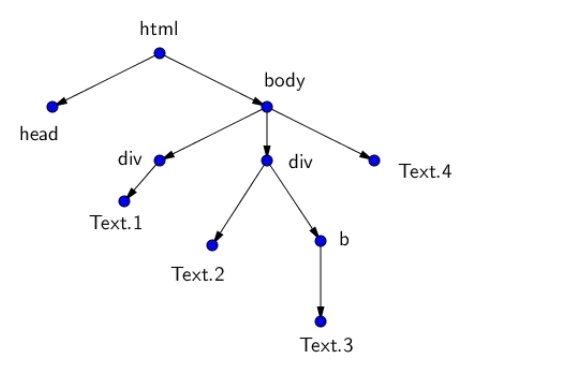

## 1.4. Beautiful Soup


Пакет **[bs4 , a.k.a BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)** был назван в честь стиха про красивый суп из Алисы в стране чудес.

BeautifulSoup — это библиотека, которая из необработанного HTML кода страницы создаёт структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что нам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Нужно будет установить пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть.

```
!pip install beautifulsoup4
```

In [ ]:
pip install --upgrade pip

In [ ]:
pip install beautifulsoup4

In [6]:
from bs4 import BeautifulSoup

In [7]:
# Создание объекта Beautiful Soup из сырого HTML
html = """
<html>
<body>
  <h1>Заголовок</h1>
  <p>Текст параграфа1</p>
  <p>Текст параграфа2</p>
  <a href="https://example.com">Ссылка</a>
</body>
</html>
"""

soup = BeautifulSoup(html, "html.parser")

# Извлечение заголовка
title = soup.find("h1").text

# Извлечение текста параграфа
paragraph = soup.find("p").text

# Извлечение ссылки
link = soup.find("a")["href"]


In [8]:
link

'https://example.com'

In [9]:
paragraph

'Текст параграфа1'

In [10]:
title

'Заголовок'

In [11]:
paragraphs = soup.find_all("p")
paragraphs

[<p>Текст параграфа1</p>, <p>Текст параграфа2</p>]

In [12]:
for item in paragraphs:
    print(item.text)

Текст параграфа1
Текст параграфа2


In [2]:
import requests
from bs4 import BeautifulSoup

html = requests.get("https://realpython.com").text
soup = BeautifulSoup(html, "html.parser")

links = soup.find_all("a")
for i in links:
    href = i.attrs.get("href")
    if href[:5]=="https":
        print(href)

https://www.pythonjobshq.com
https://www.youtube.com/realpython
https://twitter.com/realpython
https://facebook.com/LearnRealPython
https://www.instagram.com/realpython/


In [14]:
html

'\n\n<!doctype html>\n<html lang="en">\n  <head>\n    \n    \n    <link href="https://files.realpython.com" rel="preconnect">\n\n    <title>Python Tutorials – Real Python</title>\n    <meta name="author" content="Real Python">\n    <meta name="description" content="Learn Python online: Python tutorials for developers of all skill levels, Python books and courses, Python news, code examples, articles, and more.">\n    <meta name="keywords" content="">\n\n    \n\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no, viewport-fit=cover">\n\n    \n      <link rel="stylesheet" href="/static/realpython.min.b772993a9f6a.css">\n      <link rel="stylesheet" href="/static/gfonts/font.5ac42994de49.css">\n      <link rel="preload" href="/static/glightbox.min.9b438b29cef1.css" as="style" onload="this.onload=null;this.rel=\'stylesheet\'"><noscript><link rel="stylesheet" href="/static/glightbox.min.9b438b29cef1.css"></noscript>\n      \n

In [ ]:
requests.get("https://realpython.com").text

Передадим функции `BeautifulSoup` текст веб-страницы, которую мы скачали выше.

In [ ]:
soup = BeautifulSoup(html,'html.parser')

In [ ]:
type(soup)

Посмотрим что лежит внутри переменной `soup`. Невнимательный пользователь, скорее всего, скажет,что ничего вообще не изменилось. Тем не менее, это не так. Теперь мы можем свободно перемещаться по HTML-дереву страницы и искать нужные нам теги.

In [ ]:
soup.html.body.h1.text

Можно извлечь из того места, где мы оказались, текст с помощью метода `text`.

In [ ]:
soup.html.body.h1.text

Более того, зная адрес элемента, мы сразу можем найти его. Например, можно сделать это по классу. Следующая команда должна найти элемент, который лежит внутри тега `a` и имеет класс `photo`.

In [ ]:
obj = soup.find('a', attrs = {'class':'photo'})
type(obj)

## Практика

Написать программу, которая скачивает страницу с сайта на выбор с актуальным курсом валют, выделяет курс доллара к евро и выводит его. Можно пользоваться регулярными выражениями и Beautiful Soup вместе.

Пример работы с сайтом Центрального банка РФ https://www.cbr.ru/currency_base/daily/

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# Ссылка на сайт с актуальным курсом валют
url = "https://www.cbr.ru/currency_base/daily/"

# Отправляем GET запрос для получения содержимого страницы
response = requests.get(url)

# Создаем объект BeautifulSoup для парсинга HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Находим все теги <td>, содержащие значения курсов
currency_values = soup.find_all('tr')


In [ ]:
currency_values[3]

In [ ]:
currency_values[1].find

In [ ]:
currency_values[1].text.find('EUR')

In [ ]:
import requests
from bs4 import BeautifulSoup
import re


url = 'https://www.cbr.ru/currency_base/daily/'

response = requests.get(url)
response.raise_for_status()  # Проверяем, что запрос успешен

soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table', {'class': 'data'})

usd_to_eur_rate = None
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0 and cells[1].text.strip() == 'USD':
        usd_rate = float(cells[4].text.replace(',', '.'))
    if len(cells) > 0 and cells[1].text.strip() == 'EUR':
        eur_rate = float(cells[4].text.replace(',', '.'))

if usd_rate and eur_rate:
    usd_to_eur_rate = usd_rate / eur_rate

if usd_to_eur_rate:
    print(f'Курс доллара к евро: {usd_to_eur_rate:.4f}')
else:
    print('Не удалось найти курс доллара к евро.')


Можно использовать регулярные выражения с findall

In [ ]:
import re
# starting with
soup.find_all("script", src=re.compile("^whatever"))
# contains
soup.find_all("script", src=re.compile("whatever"))
# ends with 
soup.find_all("script", src=re.compile("whatever$"))

# Что делать, если сервер разозлился? 
* Вы решили собрать себе немного данных 
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами 
* Error 403, 404, 504, $\ldots$ 
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

In [ ]:
page_link = 'http://knowyourmeme.com/memes/all/page/1'

In [ ]:
response = requests.get(page_link)
response

А вот и первая проблема! Обращаемся к [главному источнику знаний](https://en.wikipedia.org/wiki/HTTP_403) и выясняем, что 403-я ошибка выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать. 

Попробуем выяснить, почему. Для этого проверим, как выглядел финальный запрос, отправленный нами на сервер.

In [ ]:
for key, value in response.request.headers.items():
    print(key+": "+value)

Похоже, мы недвусмысленно дали понять серверу, что мы используем python, а именно библиотеку requests версии 2.14.2. Скорее всего, это вызвало у сервера некоторые подозрения относительно наших благих намерений и он решил нас безжалостно отвергнуть. Для сравнения, можно посмотреть, как выглядят request-headers у запроса через браузер:

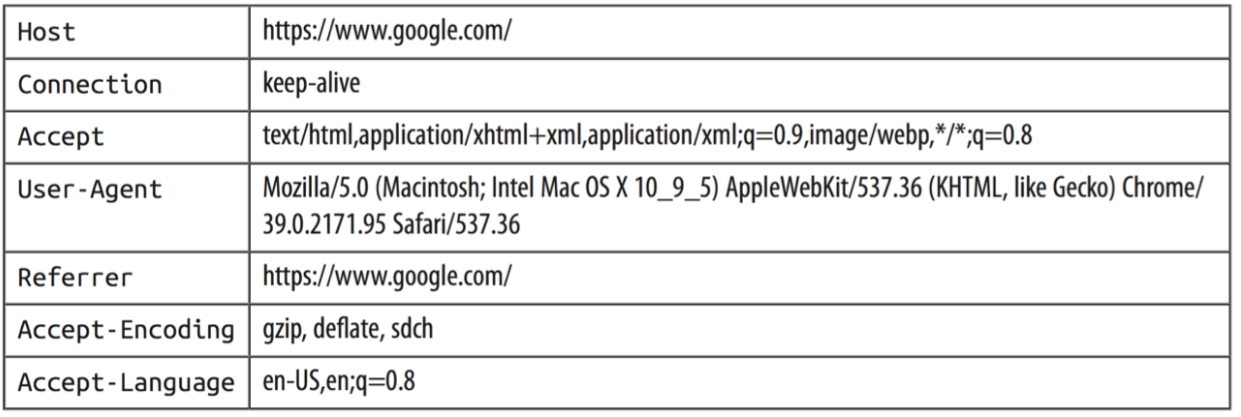

Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными.

Библиотек, которые справляются с такой задачей, существует очень много, мы воспользуемся [`fake-useragent`](https://pypi.python.org/pypi/fake-useragent). При вызове метода из различных кусочков будет генерироваться случайное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос:

In [ ]:
#pip install fake_useragent
from fake_useragent import UserAgent

In [ ]:
UserAgent().chrome

In [ ]:
response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
response

In [ ]:
Cоединение установлено и данные получены.

In [ ]:
html = response.content
html[:1000]

### быть терпеливым 

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки 
* Сервер любит временные задержки, так как боится сломаться от перегрузок

In [ ]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

###  общаться через посредников

In [ ]:
proxies = {
    'http': '182.53.206.47:47592',
    'https': '182.53.206.47:47592'
}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

Запрос работал немного подольше, ip адрес сменился. Большая часть прокси-серверов, которые вы найдёте работают плохо. Иногда запрос идёт очень долго и выгоднее сбросить его. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код перестанет работать. 

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

### уходить глубже 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tor.jpg" width="600"> 

Можно попытаться обходить злые сервера через тор. Есть несколько способов, но мы про это говорить не будем. Лучше подробно почитать [в нашей статье на Хабре.](https://habr.com/ru/company/ods/blog/346632/)

### Совместить всё? 

1. Начните с простых приемов, например с `time.sleep`
2. Пробуйте новые приёмы постепенно
3. Каждый новый приём замедляет скорость работы
4. [Разные продвинутые способы работы с библиотекой requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/)

> Напоследок, хотелось бы сказать пару слов о парсинге вообще и при помощи Тора в частности. Собирать себе данные самостоятельно - это стильно, модно и в принципе интересно, можно получить наборы, которых еще никто никогда не обрабатывал, сделать что-то новое, посмотреть, наконец, на все мемы мира сразу. Однако не стоит забывать, что ограничения, введенные сервером, в том числе баны, появились не просто так, а в целях защиты сайта от DDoS-атак. К чужому труду стоит относится с уважением, и даже если у сервера никакой защиты нет, - это еще не повод неограниченно забрасывать его своими запросами, особенно если это может привести к его отключению - [уголовное наказание](http://sd-company.su/article/security/ddosataka-ugolovnaya-otvetstvennost) никто не отменял. Успешных и безопасных вам исследований!

### Полезные материалы
1. Парсинг на Python с Beautiful Soup https://habr.com/ru/articles/544828/
2. Устанавливаем python-пакеты с помощью pip https://pythonworld.ru/osnovy/pip.html 

### Вопросы для закрепления
1. Как работает импорт модулей в Python?
2. Как исправить ошибку ModuleNotFoundError? 
3. Опишите, как устроен HTML
4. [Парсим мемы в python](https://habr.com/ru/company/ods/blog/346632/) - подробная статья на Хабре
5. [Продвинутое использование requests](https://2.python-requests.org/en/master/user/advanced/)
6. [Репозиторий](https://github.com/DmitrySerg/memology) с исследованием мемов
